In [1]:
# Importing Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read the csv file
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


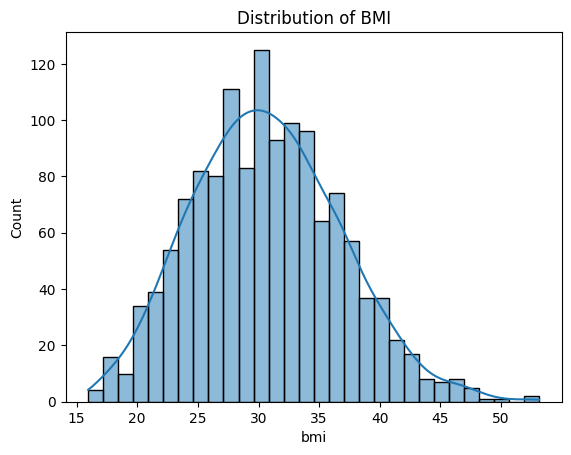

In [5]:
# Distribution of BMI
sns.histplot(data=data, x="bmi", bins=30, kde=True)
plt.title("Distribution of BMI")
plt.show()


The histogram with KDE plot shows that BMI is approximately normally distributed, with a peak around the middle values.

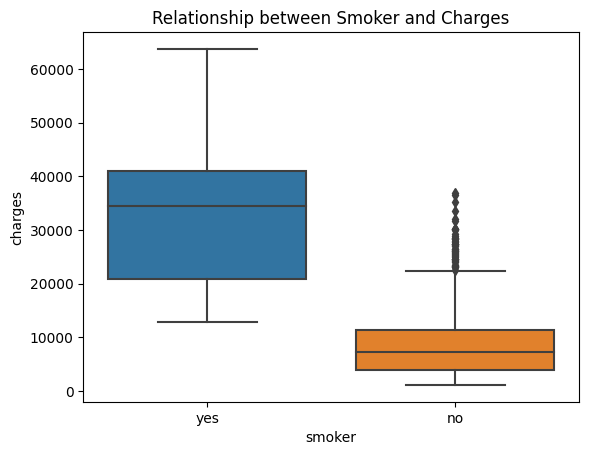

In [6]:
# Relationship between Smoker and Charges
sns.boxplot(data=data, x="smoker", y="charges")
plt.title("Relationship between Smoker and Charges")
plt.show()

Smokers tend to have significantly higher medical charges compared to non-smokers, as shown by the box plot.

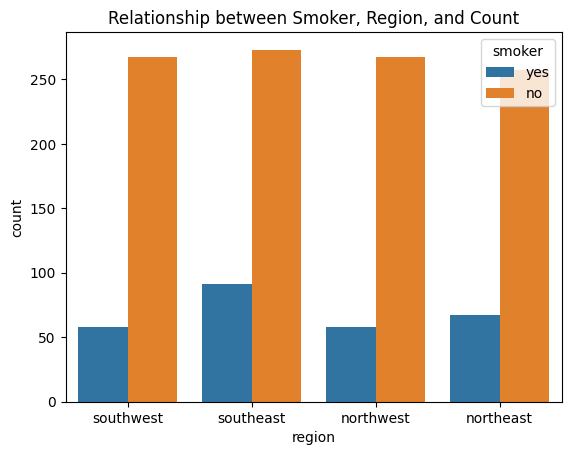

In [7]:
# Relationship between Smoker and Region
sns.countplot(data=data, x="region", hue="smoker")
plt.title("Relationship between Smoker, Region, and Count")
plt.show()

The count plot demonstrates how the number of smokers varies across different regions. Non smokers are more in each region(southwest, southeast, northwest, northeast).

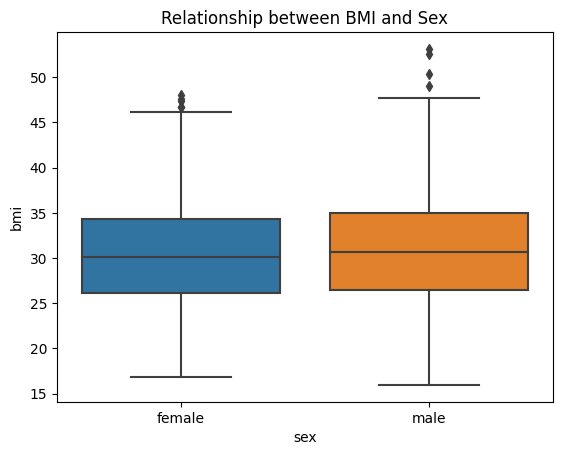

In [8]:
# Relationship between BMI and Sex
sns.boxplot(data=data, x="sex", y="bmi")
plt.title("Relationship between BMI and Sex")
plt.show()

The box plot indicates that there's little difference in BMI between males and females.

In [9]:
# Region with the Most Children
region_children = data.groupby("region")["children"].sum()
most_children_region = region_children.idxmax()
print("Region with the most children:", most_children_region)

Region with the most children: southeast


The region with code 'southeast' has the most number of children among all regions.

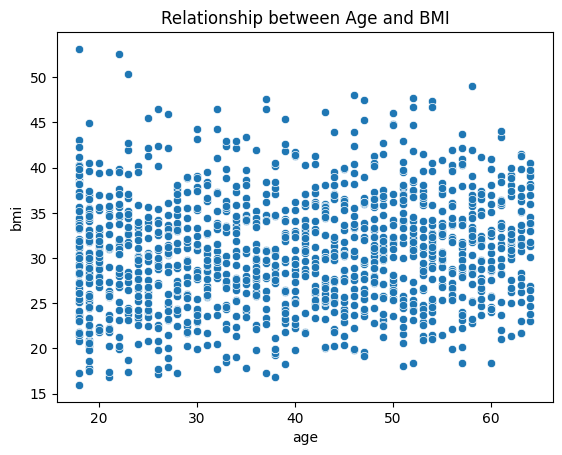

In [10]:
# Relationship between Age and BMI
sns.scatterplot(data=data, x="age", y="bmi")
plt.title("Relationship between Age and BMI")
plt.show()

The scatter plot shows that there isn't a strong linear relationship between age and BMI.

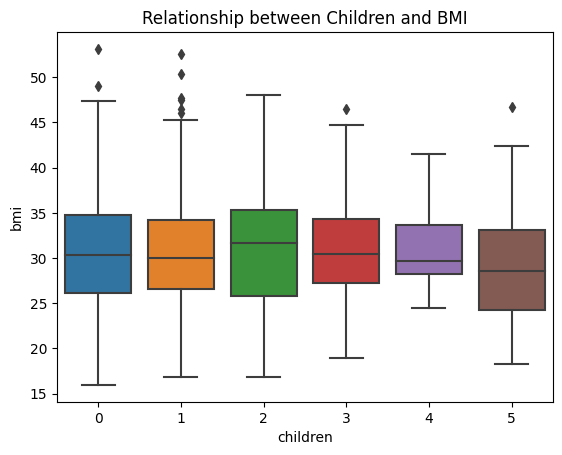

In [11]:
# Relationship between BMI and Children
sns.boxplot(data=data, x="children", y="bmi")
plt.title("Relationship between Children and BMI")
plt.show()

The scatter plot shows that there isn't a strong linear relationship between children and BMI.

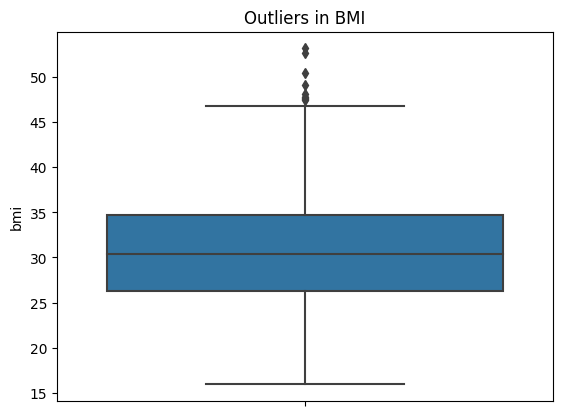

In [12]:
# Outliers in BMI
sns.boxplot(data=data, y="bmi")
plt.title("Outliers in BMI")
plt.show()

The box plot reveals some outliers in the BMI variable, indicating values that deviate significantly from the norm.

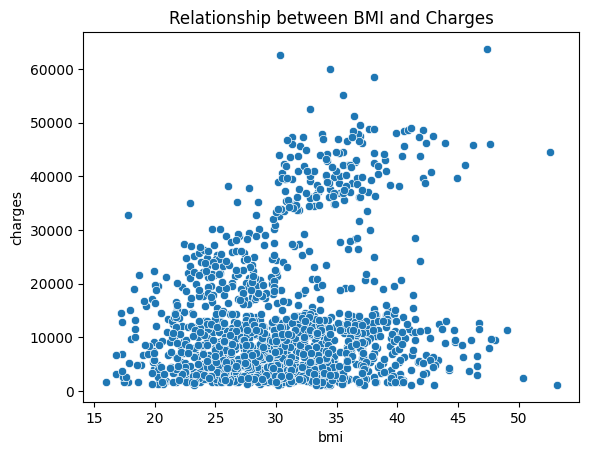

In [13]:
# Relationship between BMI and Charges
sns.scatterplot(data=data, x="bmi", y="charges")
plt.title("Relationship between BMI and Charges")
plt.show()


The scatter plot suggests that there's no clear linear correlation between BMI and medical charges.


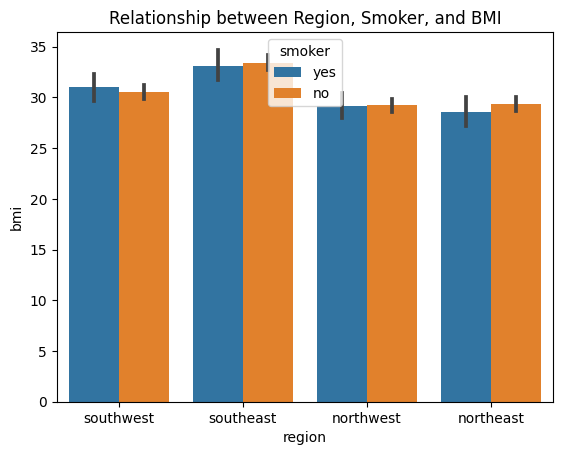

In [14]:
# Relationship between Region, Smoker, and BMI
sns.barplot(data=data, x="region", y="bmi", hue="smoker")
plt.title("Relationship between Region, Smoker, and BMI")
plt.show()

The bar plot showcases the distribution of BMI across different regions and smoking habits. In the southwest region smokers bmi are slightly more, in southeast region non smokers bmi are slightly more, in the northwest region smokers and non smokers bmi are same and in the northeast region non smokers bmi are slightly more.

In [15]:
# Importing required libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [16]:
# Preparing the data
# Separate features (X) and target (y)
X = data.drop(columns=["charges"]) #all the columns except charges-age, sex, bmi, children, smoker, region
y = data["charges"] #charges column

In [17]:
# Features-Independent Variables" or "Input Variables
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [18]:
# The target-Dependent Variable or Output Variable
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [19]:
# Applying Label Encoding to categorical columns -'sex' and  'smoker' columns
# Label Encoding is only applied to 'sex' and 'smoker' columns, because they have two or fewer unique values
label_encoder = LabelEncoder()
X["sex"] = label_encoder.fit_transform(X["sex"])
X["smoker"] = label_encoder.fit_transform(X["smoker"])
X["region"] = label_encoder.fit_transform(data["region"])

In [20]:
X["sex"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [21]:
X["smoker"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [22]:
X["region"]

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int64

In [23]:
# Apply One-Hot Encoding to the 'region' column

# Create the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop="first", categories="auto")

# Fit and transform the "region" column
region_encoded = onehot_encoder.fit_transform(X[["region"]])

# Create a DataFrame from the encoded values
region_encoded_df = pd.DataFrame(region_encoded, columns=onehot_encoder.get_feature_names_out(["region"]))


# Concatenate the encoded DataFrame with the original DataFrame
X = pd.concat([X, region_encoded_df], axis=1)

# Drop the original "region" column
X.drop(columns=["region"], inplace=True)

# Display the resulting dataframe
print(X.head())

   age  sex     bmi  children  smoker  region_1  region_2  region_3
0   19    0  27.900         0       1       0.0       0.0       1.0
1   18    1  33.770         1       0       0.0       1.0       0.0
2   28    1  33.000         3       0       0.0       1.0       0.0
3   33    1  22.705         0       0       1.0       0.0       0.0
4   32    1  28.880         0       0       1.0       0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Scaling the dataset using Standard Scaling
scaler1 = StandardScaler()  # Initialize the StandardScaler

# Fit and transform the scaler on the training data
X_train_scaled1 = scaler1.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled1 = scaler1.transform(X_test)

In [26]:
# Scaling the dataset using Min-Max Scaling
scaler2 = MinMaxScaler()  # Initialize the MinMaxScaler

# Fit and transform the scaler on the training data
X_train_scaled2 = scaler2.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled2 = scaler2.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Create instances of the regression models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
svr_model = SVR()
ridge_model = Ridge()
lasso_model = Lasso()
bayesian_reg_model = BayesianRidge()
neural_network_model = MLPRegressor()

# Train each model using preprocessed standard scaling training data
linear_reg_model.fit(X_train_scaled1, y_train)
decision_tree_model.fit(X_train_scaled1, y_train)
random_forest_model.fit(X_train_scaled1, y_train)
svr_model.fit(X_train_scaled1, y_train)
ridge_model.fit(X_train_scaled1, y_train)
lasso_model.fit(X_train_scaled1, y_train)
bayesian_reg_model.fit(X_train_scaled1, y_train)
neural_network_model.fit(X_train_scaled1, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [28]:
# Evaluate the performance of each model on the test set
from sklearn.metrics import mean_squared_error

models = [linear_reg_model, decision_tree_model, random_forest_model, svr_model, ridge_model,lasso_model,bayesian_reg_model,neural_network_model]
for model in models:
    y_pred = model.predict(X_test_scaled1)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__}: Mean Squared Error = {mse:.2f}")

LinearRegression: Mean Squared Error = 33596915.85
DecisionTreeRegressor: Mean Squared Error = 42648390.37
RandomForestRegressor: Mean Squared Error = 20871701.37
SVR: Mean Squared Error = 166128803.81
Ridge: Mean Squared Error = 33604973.54
Lasso: Mean Squared Error = 33601146.04
BayesianRidge: Mean Squared Error = 33619619.69
MLPRegressor: Mean Squared Error = 304127638.97


In [29]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import mean_absolute_error

# Dictionary to store model names and their average MSE
model_ = {}
# Evaluate each model using cross-validation
for model in models:
    # Perform cross-validation and get the negative mean squared error scores
    neg_mse_scores = cross_val_score(model, X_train_scaled1, y_train, cv=5, scoring="neg_mean_squared_error")

    # Convert negative MSE back to positive
    mse_scores = -neg_mse_scores

    # Calculate the average MSE and standard deviation
    avg_mse = mse_scores.mean()
    std_mse = mse_scores.std()

    # Predict on the validation set to calculate MAE
    y_pred_val = cross_val_predict(model, X_train_scaled1, y_train, cv=5)
    mae = mean_absolute_error(y_train, y_pred_val)

     # Store the average MSE and standard deviation in the dictionary
    model_[model.__class__.__name__] = (avg_mse, std_mse,mae)

    # Print the results
    print(f"{model.__class__.__name__}:")
    print(f"   Average MSE = {avg_mse:.2f}")
    print(f"   Std Deviation of MSE = {std_mse:.2f}")
    print(f"   MAE = {mae:.2f}")
    print()

LinearRegression:
   Average MSE = 37947891.05
   Std Deviation of MSE = 5031823.96
   MAE = 4245.23

DecisionTreeRegressor:
   Average MSE = 43448537.88
   Std Deviation of MSE = 6935700.41
   MAE = 3189.95

RandomForestRegressor:
   Average MSE = 25237629.91
   Std Deviation of MSE = 4479109.40
   MAE = 2849.83

SVR:
   Average MSE = 158346157.82
   Std Deviation of MSE = 16661774.35
   MAE = 8271.25

Ridge:
   Average MSE = 37946136.04
   Std Deviation of MSE = 5021591.18
   MAE = 4246.44

Lasso:
   Average MSE = 37946620.73
   Std Deviation of MSE = 5031244.46
   MAE = 4245.00

BayesianRidge:
   Average MSE = 37945391.25
   Std Deviation of MSE = 5004641.47
   MAE = 4248.75



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLPRegressor:
   Average MSE = 310474979.26
   Std Deviation of MSE = 26796043.20
   MAE = 13032.62



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


A model with the lowest average Mean Squared Error (MSE) and low standard deviation is the best-performing model. Because lower MSE indicates better predictive performance and a lower standard deviation suggests more consistent results across different cross-validation folds.

In [30]:
best_model = min(model_, key=lambda k: (model_[k][0], model_[k][1],model_[k][2]))
print(f"The best performing model with using standard scaling dataset: {best_model}")

The best performing model with using standard scaling dataset: RandomForestRegressor


In [31]:
# Create instances of the regression models
linear_reg_model2 = LinearRegression()
decision_tree_model2 = DecisionTreeRegressor()
random_forest_model2 = RandomForestRegressor()
svr_model2 = SVR()
ridge_model2 = Ridge()
lasso_model2 = Lasso()
bayesian_reg_model2 = BayesianRidge()
neural_network_model2 = MLPRegressor()

# Train each model using preprocessed min-max scaling training data
linear_reg_model2.fit(X_train_scaled2, y_train)
decision_tree_model2.fit(X_train_scaled2, y_train)
random_forest_model2.fit(X_train_scaled2, y_train)
svr_model2.fit(X_train_scaled2, y_train)
ridge_model2.fit(X_train_scaled1, y_train)
lasso_model2.fit(X_train_scaled1, y_train)
bayesian_reg_model2.fit(X_train_scaled1, y_train)
neural_network_model2.fit(X_train_scaled1, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [32]:
# Evaluate the performance of each model on the test set
from sklearn.metrics import mean_squared_error

models = [linear_reg_model2, decision_tree_model2, random_forest_model2, svr_model2, ridge_model2, lasso_model2, bayesian_reg_model2, neural_network_model2]
for model in models:
    y_pred = model.predict(X_test_scaled2)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__}: Mean Squared Error = {mse:.2f}")

LinearRegression: Mean Squared Error = 33596915.85
DecisionTreeRegressor: Mean Squared Error = 51609698.95
RandomForestRegressor: Mean Squared Error = 21059934.87
SVR: Mean Squared Error = 166049875.93
Ridge: Mean Squared Error = 103812316.83
Lasso: Mean Squared Error = 103812328.84
BayesianRidge: Mean Squared Error = 103855389.43
MLPRegressor: Mean Squared Error = 303789942.56


In [33]:
from sklearn.model_selection import cross_val_score

# Dictionary to store model names and their average MSE
model_ = {}
# Evaluate each model using cross-validation
for model in models:
    # Perform cross-validation and get the negative mean squared error scores
    neg_mse_scores = cross_val_score(model, X_train_scaled2, y_train, cv=5, scoring="neg_mean_squared_error")

    # Convert negative MSE back to positive
    mse_scores = -neg_mse_scores

    # Calculate the average MSE and standard deviation
    avg_mse = mse_scores.mean()
    std_mse = mse_scores.std()

    # Predict on the validation set to calculate MAE
    y_pred_val = cross_val_predict(model, X_train_scaled2, y_train, cv=5)
    mae = mean_absolute_error(y_train, y_pred_val)

     # Store the average MSE and standard deviation in the dictionary
    model_[model.__class__.__name__] = (avg_mse, std_mse,mae)

    # Print the results
    print(f"{model.__class__.__name__}:")
    print(f"   Average MSE = {avg_mse:.2f}")
    print(f"   Std Deviation of MSE = {std_mse:.2f}")
    print(f"   MAE = {mae:.2f}")
    print()

LinearRegression:
   Average MSE = 37947891.05
   Std Deviation of MSE = 5031823.96
   MAE = 4245.23

DecisionTreeRegressor:
   Average MSE = 44606172.70
   Std Deviation of MSE = 6476643.05
   MAE = 3339.11

RandomForestRegressor:
   Average MSE = 25251330.39
   Std Deviation of MSE = 4528722.56
   MAE = 2841.52

SVR:
   Average MSE = 158262500.83
   Std Deviation of MSE = 16660715.39
   MAE = 8272.61

Ridge:
   Average MSE = 37940442.19
   Std Deviation of MSE = 4958748.06
   MAE = 4235.18

Lasso:
   Average MSE = 37945275.34
   Std Deviation of MSE = 5029244.70
   MAE = 4243.76

BayesianRidge:
   Average MSE = 37944089.22
   Std Deviation of MSE = 5005089.08
   MAE = 4241.12



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLPRegressor:
   Average MSE = 306649389.51
   Std Deviation of MSE = 26521812.10
   MAE = 12809.01



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
best_model = min(model_, key=lambda k: (model_[k][0], model_[k][1],model_[k][2]))
print(f"The best performing model with using min-max scaling dataset: {best_model}")

The best performing model with using min-max scaling dataset: RandomForestRegressor


Some of the hyperparameters for Random Forest model:

-n_estimators: The number of decision trees in the forest. higher value leads better performance, but it might increase the risk of overfitting.

-max_depth: The maximum depth of each decision tree in the forest. Higher value allows the trees to capture more complex patterns, but it can also lead to overfitting.

-min_samples_split: The minimum number of samples required to split an internal node. Increasing this value prevents overfitting.

-min_samples_leaf: The minimum number of samples required to be at a leaf node. It control overfitting.

-max_features: The number of features to consider when looking for the best split. A lower value can reduce overfitting, but might also decrease model performance.

-bootstrap: Whether to use bootstrapping (sampling with replacement) when building trees. Setting it to False can reduce overfitting.

In [ ]:
# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [ ]:
#using standard scaling dataset
from sklearn.model_selection import GridSearchCV

# Create an instance of the Random Forest model
rf_model = RandomForestRegressor()

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_scaled1, y_train)

# Get the best hyperparameters and model
best_params_rf = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Random Forest Model:", best_rf_model)


In [ ]:
# Train the Random Forest model using the entire training data
best_rf_model.fit(X_train_scaled1, y_train)

In [ ]:
# Predict using the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled1)

# Calculate metrics for evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest Mean Absolute Error: {mae_rf:.2f}")


In [ ]:
from sklearn.metrics import r2_score
# Predict using the trained Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled1)

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R-squared: {r2_rf:.2f}")


In [40]:
#using min-max scaling dataset
from sklearn.model_selection import GridSearchCV

# Create an instance of the Random Forest model
rf_model = RandomForestRegressor()

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_scaled2, y_train)

# Get the best hyperparameters and model
best_params_rf = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Random Forest Model:", best_rf_model)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest Model: RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10)


In [41]:
# Train the Random Forest model using the entire training data
best_rf_model.fit(X_train_scaled2, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10)

In [42]:
# Predict using the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled2)

# Calculate metrics for evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest Mean Absolute Error: {mae_rf:.2f}")


Random Forest Mean Squared Error: 18596238.90
Random Forest Mean Absolute Error: 2440.38


In [43]:
# Predict using the trained Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled2)

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R-squared: {r2_rf:.2f}")


Random Forest R-squared: 0.88


In [44]:
#using standard scaling dataset
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create an instance of the Random Forest model
rf_model = RandomForestRegressor()

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the random search to the data
random_search.fit(X_train_scaled1, y_train)

# Get the best hyperparameters and model
best_params_rf = random_search.best_params_
best_rf_model = random_search.best_estimator_

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Random Forest Model:", best_rf_model)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Hyperparameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
Best Random Forest Model: RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=4,
                      n_estimators=50)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [45]:
# Train the Random Forest model using the entire training data
best_rf_model.fit(X_train_scaled1, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=4,
                      n_estimators=50)

In [46]:
# Train the Random Forest model using the best hyperparameters
best_rf_model.fit(X_train_scaled1, y_train)

# Predict using the trained Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled1)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate R-squared (Coefficient of Determination)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean Squared Error (MSE): 18814961.90
Mean Absolute Error (MAE): 2442.16
R-squared (R2): 0.88


In [47]:
#using min-max scaling dataset
# Create an instance of the Random Forest model
rf_model = RandomForestRegressor()

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the random search to the data
random_search.fit(X_train_scaled2, y_train)

# Get the best hyperparameters and model
best_params_rf = random_search.best_params_
best_rf_model = random_search.best_estimator_

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Random Forest Model:", best_rf_model)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Hyperparameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
Best Random Forest Model: RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=50)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
# Train the Random Forest model using the entire training data
best_rf_model.fit(X_train_scaled2, y_train)

In [ ]:
# Train the Random Forest model using the best hyperparameters
best_rf_model.fit(X_train_scaled2, y_train)

# Predict using the trained Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled2)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate R-squared (Coefficient of Determination)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")


In [ ]:
#A wider range of hyperparameters in the Grid Search using standard scaling dataset

# Define a parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create an instance of the Random Forest model
rf_model = RandomForestRegressor()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_scaled1, y_train)

# Get the best hyperparameters and model
best_params_rf = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Random Forest Model:", best_rf_model)

# Train the Random Forest model using the best hyperparameters
best_rf_model.fit(X_train_scaled1, y_train)

# Predict using the trained Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled1)

# Calculate R-squared (Coefficient of Determination) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R-squared for Random Forest: {r2_rf:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

In [ ]:
#A wider range of hyperparameters in the Grid Search using min-max scaling dataset

# Define a broader parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create an instance of the Random Forest model
rf_model = RandomForestRegressor()

# Create an instance of RandomizedSearchCV with a higher number of iterations
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=20,
                                   scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the random search to the data
random_search.fit(X_train_scaled2, y_train)

# Get the best hyperparameters and model
best_params_rf = random_search.best_params_
best_rf_model = random_search.best_estimator_

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Random Forest Model:", best_rf_model)

# Train the Random Forest model using the best hyperparameters
best_rf_model.fit(X_train_scaled2, y_train)

# Predict using the trained Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled2)

# Calculate R-squared (Coefficient of Determination) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R-squared for Random Forest: {r2_rf:.2f}")


In [ ]:
#A wider range of hyperparameters in the Randomized Search using standard scaling dataset

# Define a broader parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create an instance of the Random Forest model
rf_model = RandomForestRegressor()

# Create an instance of RandomizedSearchCV with a higher number of iterations
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=20,
                                   scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the random search to the data
random_search.fit(X_train_scaled1, y_train)

# Get the best hyperparameters and model
best_params_rf = random_search.best_params_
best_rf_model = random_search.best_estimator_

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Random Forest Model:", best_rf_model)

# Train the Random Forest model using the best hyperparameters
best_rf_model.fit(X_train_scaled1, y_train)

# Predict using the trained Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled1)

# Calculate R-squared (Coefficient of Determination) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R-squared for Random Forest: {r2_rf:.2f}")


In [ ]:
#A wider range of hyperparameters in the Randomized Search using min-max scaling dataset

# Define a broader parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create an instance of the Random Forest model
rf_model = RandomForestRegressor()

# Create an instance of RandomizedSearchCV with a higher number of iterations
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=20,
                                   scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the random search to the data
random_search.fit(X_train_scaled2, y_train)

# Get the best hyperparameters and model
best_params_rf = random_search.best_params_
best_rf_model = random_search.best_estimator_

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Random Forest Model:", best_rf_model)

# Train the Random Forest model using the best hyperparameters
best_rf_model.fit(X_train_scaled2, y_train)

# Predict using the trained Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled2)

# Calculate R-squared (Coefficient of Determination) for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R-squared for Random Forest: {r2_rf:.2f}")


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the Gradient Boosting Regressor using standard scaling dataset
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Regressor using the scaled training data
gb_model.fit(X_train_scaled1, y_train)

# Predict using the trained Gradient Boosting Regressor
y_pred_gb = gb_model.predict(X_test_scaled1)

# Calculate R-squared (Coefficient of Determination) for Gradient Boosting Regressor
r2_gb = r2_score(y_test, y_pred_gb)

print(f"R-squared for Gradient Boosting Regressor: {r2_gb:.2f}")

In [ ]:

# Create an instance of the Gradient Boosting Regressor using min-max dataset
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Regressor using the scaled training data
gb_model.fit(X_train_scaled2, y_train)

# Predict using the trained Gradient Boosting Regressor
y_pred_gb = gb_model.predict(X_test_scaled2)

# Calculate R-squared (Coefficient of Determination) for Gradient Boosting Regressor
r2_gb = r2_score(y_test, y_pred_gb)

print(f"R-squared for Gradient Boosting Regressor: {r2_gb:.2f}")

In [ ]:
#Feature importance analysis in random forest regression using min-max scaling dataset

# Create an instance of the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the Random Forest Regressor using the scaled training data
rf_model.fit(X_train_scaled2, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")
# Sort features by importance
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_scaled2.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train_scaled2.shape[1]), X_train.columns[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# Identify features with low importance
threshold = 0.02  # Set your desired threshold
low_importance_features = X_train.columns[feature_importances < threshold]

# Remove features with low importance
X_train_selected = X_train.drop(columns=low_importance_features)
X_test_selected = X_test.drop(columns=low_importance_features)

# Retrain the model on the selected features
rf_model.fit(X_train_selected, y_train)

# Predict using the trained Random Forest Regressor with selected features
y_pred_rf_selected = rf_model.predict(X_test_selected)

# Calculate R-squared (Coefficient of Determination) for the selected features
r2_rf_selected = r2_score(y_test, y_pred_rf_selected)

print(f"R-squared for Random Forest with selected features: {r2_rf_selected:.2f}")

In [ ]:
#Feature importance analysis in random forest regression using standard scaling dataset

# Create an instance of the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the Random Forest Regressor using the scaled training data
rf_model.fit(X_train_scaled1, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")
# Sort features by importance
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_scaled1.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train_scaled1.shape[1]), X_train.columns[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# Identify features with low importance
threshold = 0.02  # Set your desired threshold
low_importance_features = X_train.columns[feature_importances < threshold]

# Remove features with low importance
X_train_selected = X_train.drop(columns=low_importance_features)
X_test_selected = X_test.drop(columns=low_importance_features)

# Retrain the model on the selected features
rf_model.fit(X_train_selected, y_train)

# Predict using the trained Random Forest Regressor with selected features
y_pred_rf_selected = rf_model.predict(X_test_selected)

# Calculate R-squared (Coefficient of Determination) for the selected features
r2_rf_selected = r2_score(y_test, y_pred_rf_selected)

print(f"R-squared for Random Forest with selected features: {r2_rf_selected:.2f}")


The best regression model from the selected several regression models is random forest regression. I applied hyperparameter tuning to the random forest regression for both the min-max scaling dataset and the standard scaling dataset but the R2 value(0.88) remained the same. I used Grid Search and Randomized Search but the R2 value remained again same. Then I apply feature importance analysis for the random forest regression for both the min-max scaling dataset and the standard dataset. The value of R2 is